# Trabajo Nº 1

## Erick Tornero
## Sistemas inteligentes

Solución a la comtetición de Kaggle:
[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

**Objetivo:**
Obtener el precio de una casa de acuerdo a 79 características

# Cargar los datos:
* Obtener la data desde una carpeta Local

In [429]:
import os
## Default folder when data is downloaded
url_train = os.path.join('all','train.csv')
# Get the data through 'Pandas' API
import pandas as pd
def load_data(train_path):
    # Index 0 represents the ID
    return pd.read_csv(url_train, index_col = 0)
data = load_data(url_train)
data.shape

(1460, 80)

# Análisis de datos-características
* Análisis gráfico y de correlación con el parámetro objetivo ('SalePrice') Para datos numéricos

In [430]:
# Obtener la matriz de correlación:
mat_corr = data.corr()

In [431]:
# Mostrar las variables con más correlación:
mat_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### La siguiente gráfica proporcionara una mejor idea de la correlación entre variables:

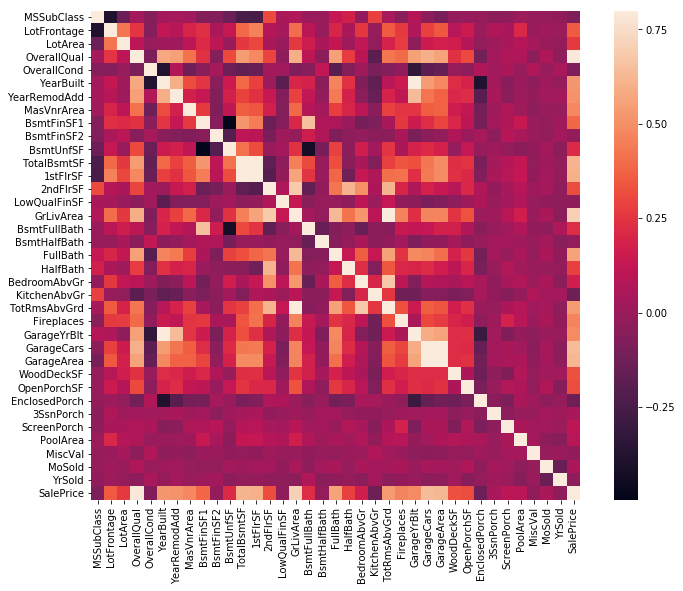

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(mat_corr, vmax=.8, square=True);

Analizando el gráfico, la columna o fila que contiene a **SalePrice** es la más importante, sin embargo se pueden utilizar las demás filas para descartar datos correlaciónados entre sí que podrían estar proporcionando información redundante

Si se consideran datos correlacionados superiores al **25%** las características seleccionadas serían las siguientes:

Características | Correlacion
--- | --- 
OverallQual  |    0.790982
GrLivArea    |    0.708624
GarageCars   |    0.640409
GarageArea   |    0.623431
TotalBsmtSF  |    0.613581
1stFlrSF     |    0.605852
FullBath     |    0.560664
TotRmsAbvGrd |    0.533723
YearBuilt    |    0.522897
YearRemodAdd |    0.507101
GarageYrBlt  |    0.486362
MasVnrArea   |    0.477493
Fireplaces   |    0.466929
BsmtFinSF1   |    0.386420
LotFrontage  |    0.351799
WoodDeckSF   |    0.324413
2ndFlrSF     |    0.319334
OpenPorchSF  |    0.315856
HalfBath     |    0.284108
LotArea      |    0.263843

### Descarte de características:
- A continuación se descartaran algunas características (columnas) por estar altamente correlacionada con otra característica, se descarta la que tiene menos correlación con SalePrice

Por ejemplo **YearBuilt** y **GarageYrBlt** tienen una correlación alta, por lo que se puede descartar **GarageYrBlt**

**GarageCars** y **GarageArea** tienen una correlación fuerte por lo que esta última se descarta.

**OverallQual** tiene correlación de más de 0.5 con **MasVnrArea** por lo que esta última se descarta.

**GrLivArea** tiene correlación alta con **2ndFlrSF**, esta última se descarta.


Las características que se utilizará son:

Características | Correlacion
--- | --- 
OverallQual  |    0.790982
GrLivArea    |    0.708624
GarageCars   |    0.640409
TotalBsmtSF  |    0.613581
1stFlrSF     |    0.605852
FullBath     |    0.560664
TotRmsAbvGrd |    0.533723
YearBuilt    |    0.522897
YearRemodAdd |    0.507101
Fireplaces   |    0.466929
BsmtFinSF1   |    0.386420
LotFrontage  |    0.351799
WoodDeckSF   |    0.324413
OpenPorchSF  |    0.315856
HalfBath     |    0.284108
LotArea      |    0.263843

### Gráfica de características con correlación fuerte con SalePrice

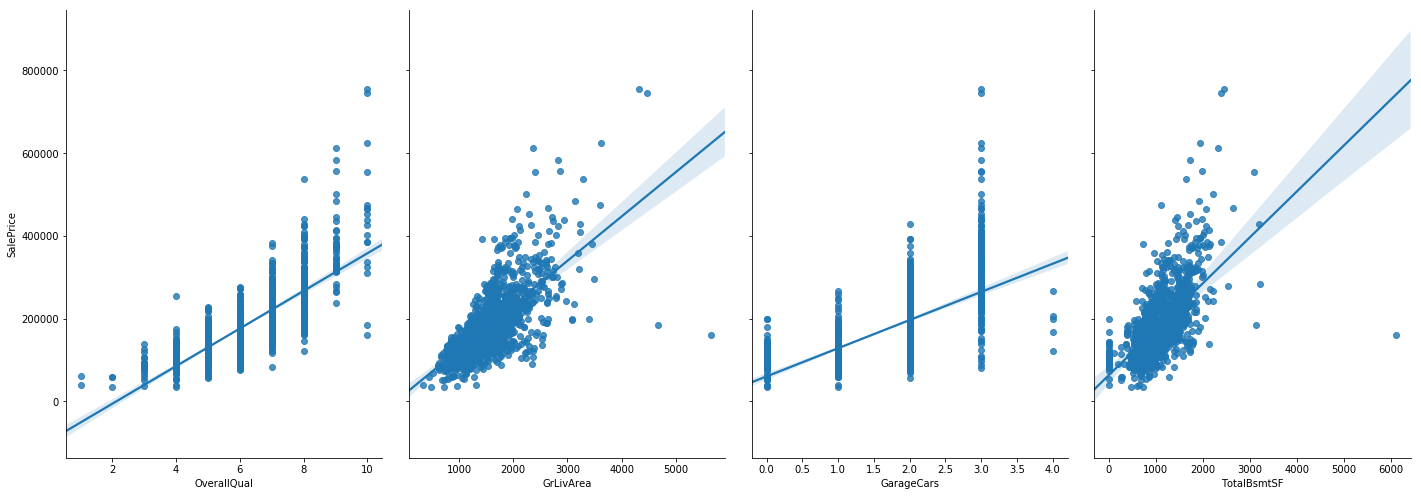

In [433]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

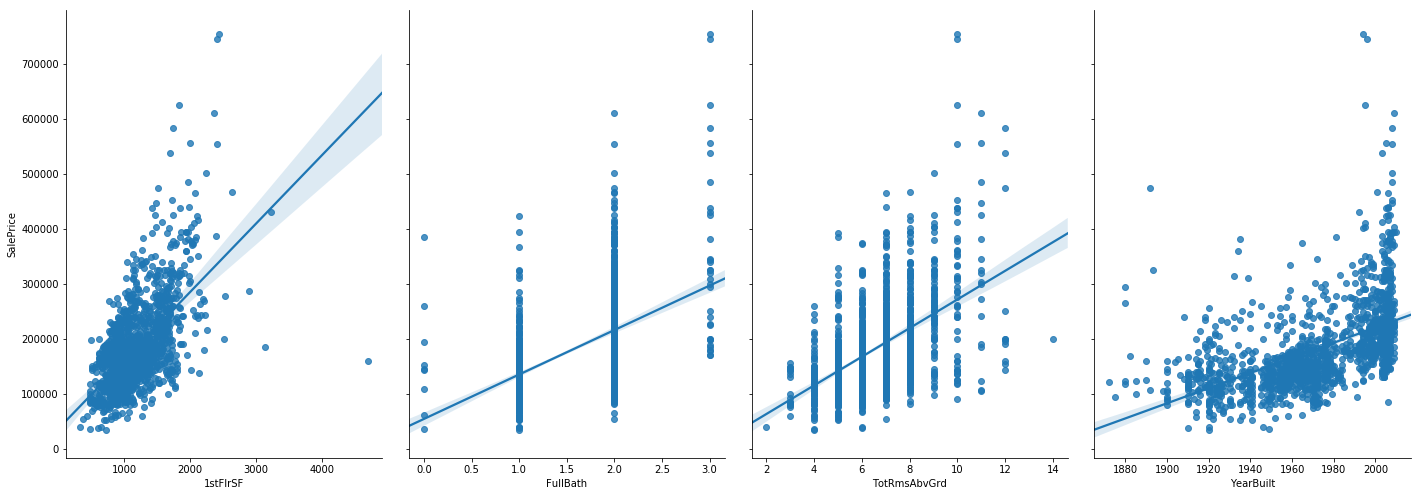

In [434]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

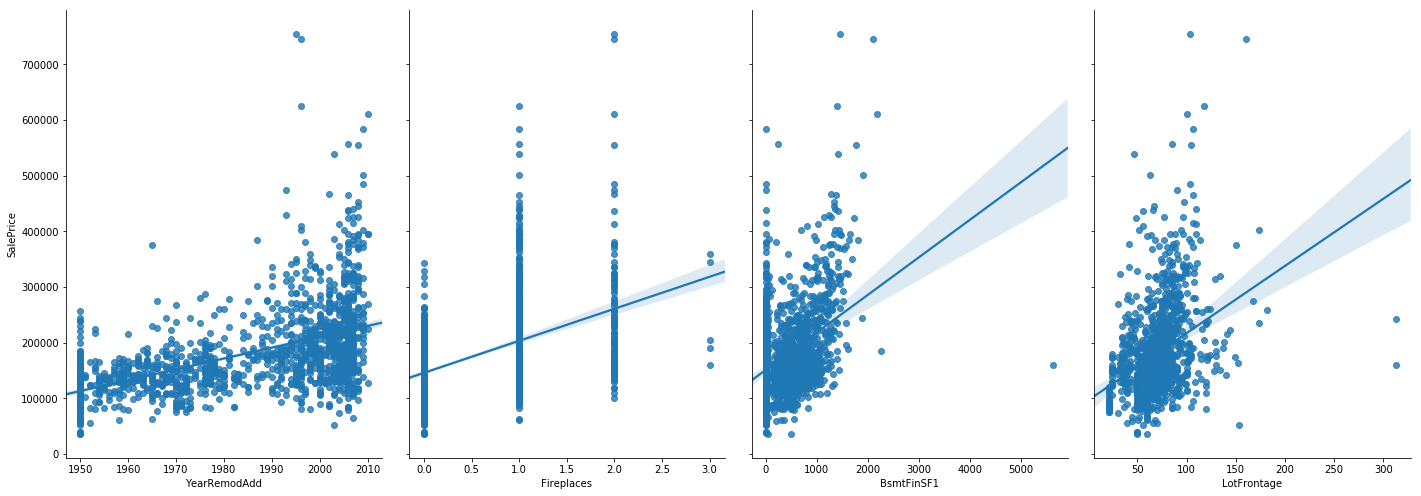

In [435]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['YearRemodAdd','Fireplaces','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

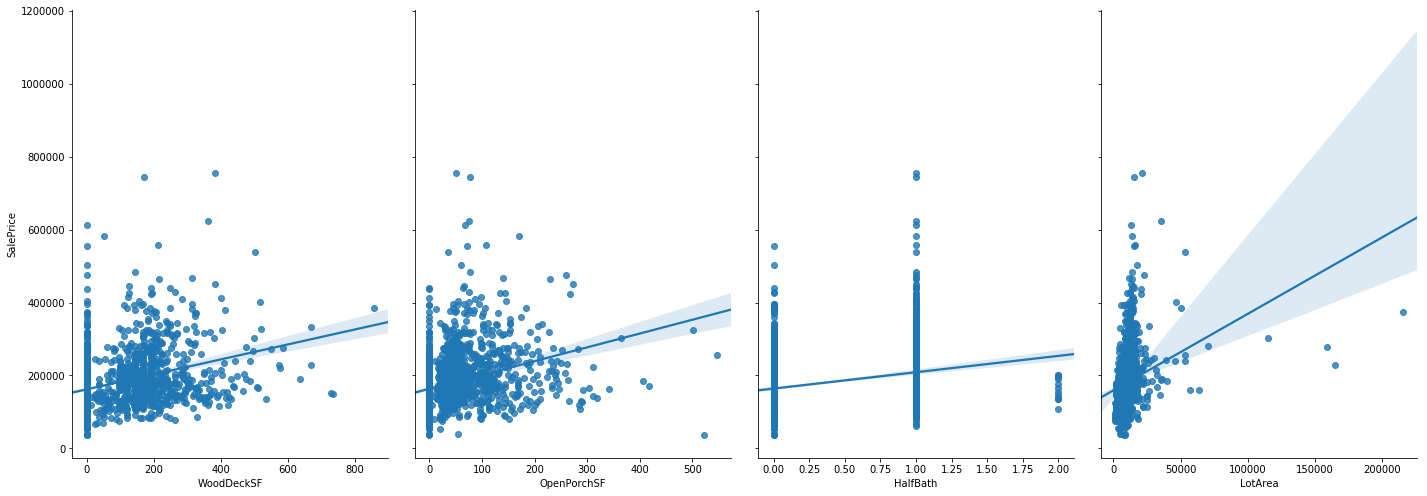

In [436]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['WoodDeckSF','OpenPorchSF','HalfBath','LotArea'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

## Data categórica

In [437]:
replace_map = {'MSZoning':{'A': 1, 'C (all)': 2 , 'RH': 5,  'RM': 9,'FV': 13,  'RL': 16}}
data.replace(replace_map, inplace = True)
data['MSZoning'].value_counts()

16    1151
9      218
13      65
5       16
2       10
Name: MSZoning, dtype: int64

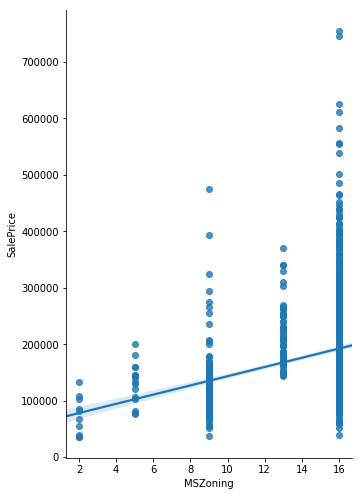

In [438]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['MSZoning'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [439]:
# Encode Alley_
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [440]:
replace_alley = {'Alley':{'Pave': 5 , 'Grvl': 10}}
data.replace(replace_alley, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,16,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,16,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,16,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,16,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,16,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [441]:
data['Alley'].fillna(value = 1,inplace = True )
data['Alley'].value_counts()

1.0     1369
10.0      50
5.0       41
Name: Alley, dtype: int64

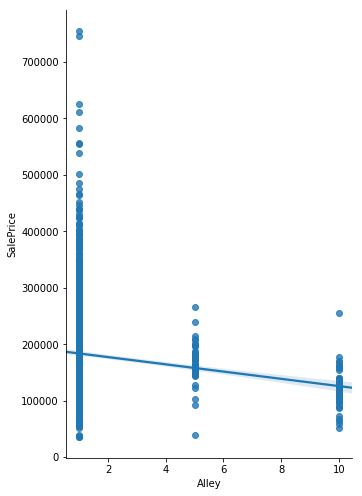

In [442]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['Alley'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [443]:
# Encoding ExternalQual

In [444]:
data['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [445]:
replace_ext = {'ExterQual':{'TA':12,'Gd':16,'Ex':20,'Fa':8,'Po':3}}

In [446]:
data.replace(replace_ext, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,16,65.0,8450,Pave,1.0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,16,80.0,9600,Pave,1.0,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,16,68.0,11250,Pave,1.0,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,16,60.0,9550,Pave,1.0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,16,84.0,14260,Pave,1.0,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


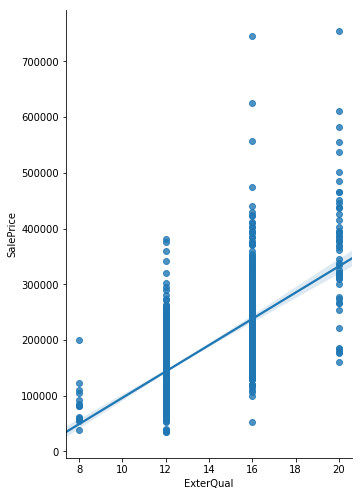

In [447]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['ExterQual'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [448]:
# Encoding **BsmtQual**

In [449]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [450]:
data['BsmtQual'].fillna(value=1, inplace=True)
replace_BSMTQ= {'BsmtQual':{'TA':12,'Gd':16,'Ex':20,'Fa':8,'Po':5}}
data.replace(replace_BSMTQ, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,16,65.0,8450,Pave,1.0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,16,80.0,9600,Pave,1.0,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,16,68.0,11250,Pave,1.0,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,16,60.0,9550,Pave,1.0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,16,84.0,14260,Pave,1.0,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [451]:
data['BsmtQual'].value_counts()

12    649
16    618
20    121
1      37
8      35
Name: BsmtQual, dtype: int64

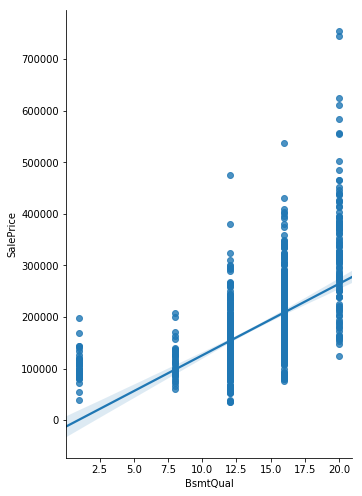

In [452]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['BsmtQual'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [453]:
# Encoding SaleType

In [454]:
data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [455]:
replace_SaleT= {'SaleType':{'WD':17,'New':25,'COD':18,'ConLD':13,'ConLI':19,
                           'ConLw':30,'CWD':15,'Oth':12,'Con':10}}

In [456]:
data.replace(replace_SaleT, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,16,65.0,8450,Pave,1.0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,17,Normal,208500
2,20,16,80.0,9600,Pave,1.0,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,17,Normal,181500
3,60,16,68.0,11250,Pave,1.0,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,17,Normal,223500
4,70,16,60.0,9550,Pave,1.0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,17,Abnorml,140000
5,60,16,84.0,14260,Pave,1.0,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,17,Normal,250000


In [457]:
data['SaleType'].value_counts()

17    1267
25     122
18      43
13       9
30       5
19       5
15       4
12       3
10       2
Name: SaleType, dtype: int64

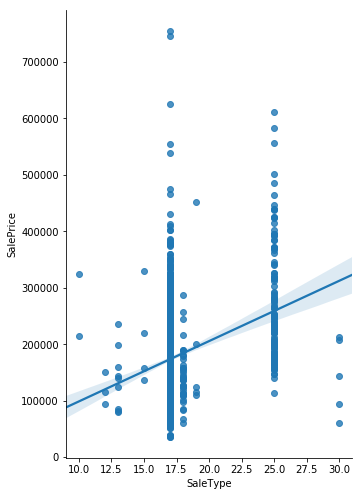

In [458]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(data, x_vars=['SaleType'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

### Deleting Outliers from data
En esta parte se borrara datos que están alejados de un comportamiento normal dado el resto de datos.
#### Numeric data
* GrLivArea
* TotalBmstSF
* 1stFlrSF
* BsmtFinSF1
* LotFrontage
* LotArea

#### Categorical data:

* MSZoning
* ExterQual
* BsmtQual
* SaleType

In [459]:
## Deleting Outlier from GrLivArea
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
## Deleting Outlier from TotalBmstSF
data = data.drop(data[(data['TotalBsmtSF']>5000) & (data['SalePrice']<300000)].index)
## Deleting Outlier from 1stFlrSF
data = data.drop(data[(data['1stFlrSF']>4000) & (data['SalePrice']<300000)].index)
## Deleting Outlier from BsmtFinSF1
data = data.drop(data[(data['BsmtFinSF1']>5000) & (data['SalePrice']<300000)].index)
## Deleting Outlier from LotFrontage
data = data.drop(data[(data['LotFrontage']>300) & (data['SalePrice']<300000)].index)
## Deleting Outlier from LotArea
data = data.drop(data[(data['LotArea']>150000) & (data['SalePrice']<450000)].index)

In [460]:
data.shape

(1454, 80)

## Manejo de ausencia de datos
Eliminar características si estas exceden el 20%

In [461]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1448,0.995873
MiscFeature,1402,0.964237
Fence,1173,0.806740
FireplaceQu,690,0.474553
LotFrontage,257,0.176754
GarageType,81,0.055708
GarageFinish,81,0.055708
GarageQual,81,0.055708
GarageCond,81,0.055708
GarageYrBlt,81,0.055708


In [462]:
#dealing with missing data
## Delet all missing data with more than 1 missin data
data = data.drop((missing_data[missing_data['Total'] > 300]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...

257

In [463]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
LotFrontage,257,0.176875
GarageType,81,0.055747
GarageYrBlt,81,0.055747
GarageFinish,81,0.055747
GarageCond,81,0.055747
GarageQual,81,0.055747
BsmtExposure,38,0.026153
BsmtFinType2,38,0.026153
BsmtFinType1,37,0.025465
BsmtCond,37,0.025465


## Normalización

**Normalizar 'SalePrice'**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


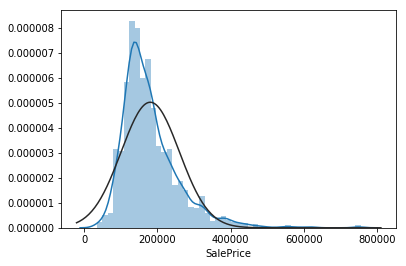

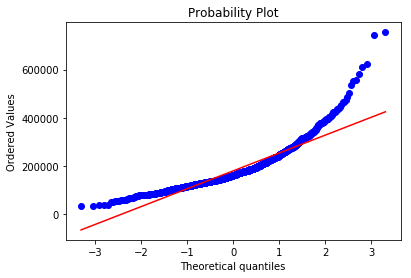

In [464]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(data['SalePrice'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [465]:
# Normalizing 'SalePrice' feature
#applying log transformation
import numpy as np
data['SalePrice'] = np.log(data['SalePrice'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


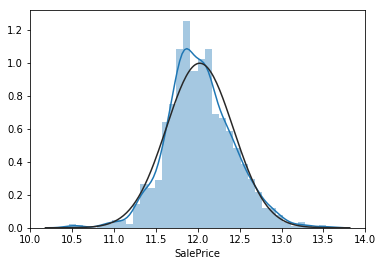

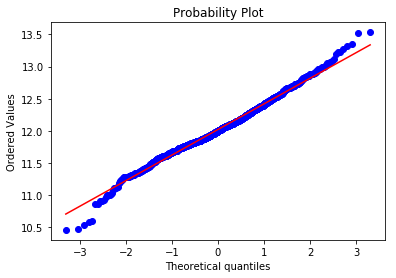

In [466]:
sns.distplot(data['SalePrice'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

**Normalizar OverallQual**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


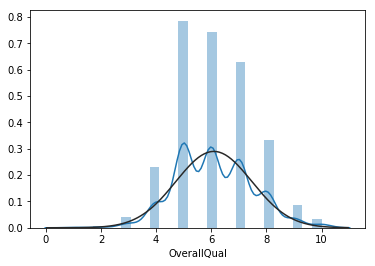

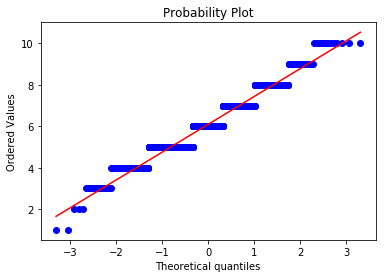

In [467]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(data['OverallQual'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['OverallQual'], plot=plt)

--- no necesita normalizar ---

**Normalizar GrLivArea**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


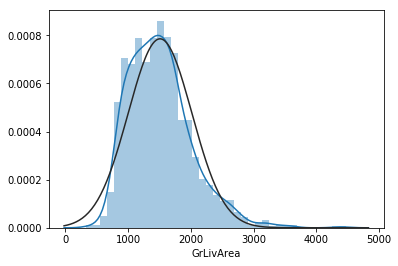

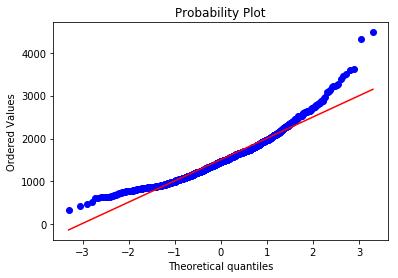

In [468]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(data['GrLivArea'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [469]:
data['GrLivArea'] = np.log(data['GrLivArea'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


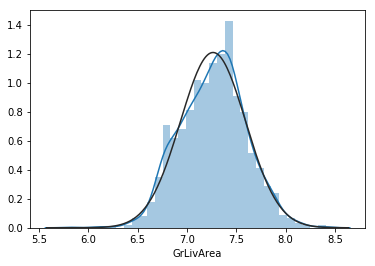

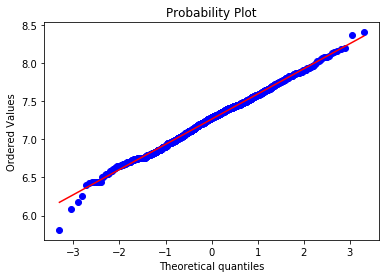

In [470]:
sns.distplot(data['GrLivArea'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

**Normalizar 1stFlrSF**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


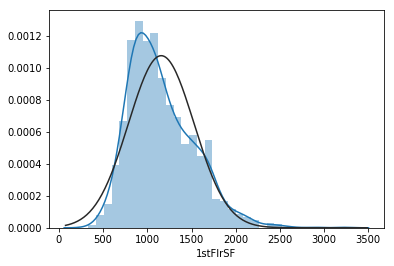

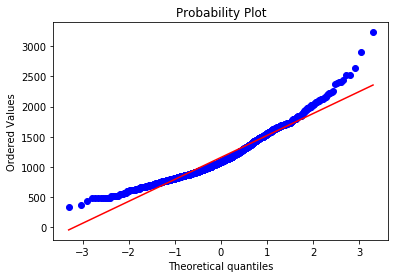

In [471]:
sns.distplot(data['1stFlrSF'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['1stFlrSF'], plot=plt)

In [472]:
data['1stFlrSF'] = np.log(data['1stFlrSF'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


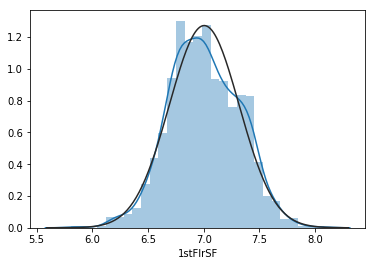

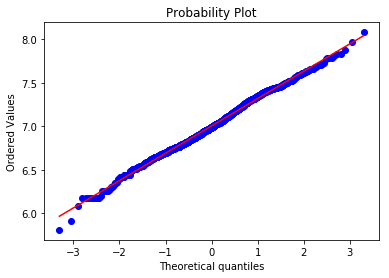

In [473]:
sns.distplot(data['1stFlrSF'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['1stFlrSF'], plot=plt)

**Normalizar TotRmsAbvGrd**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


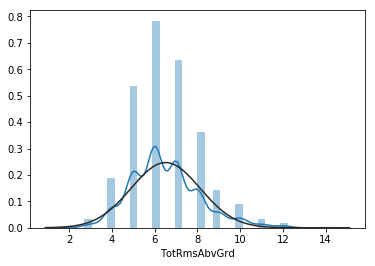

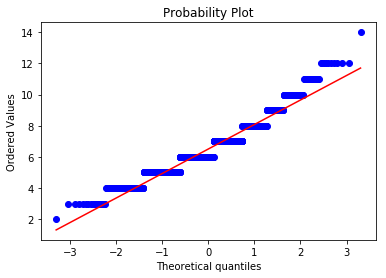

In [474]:
sns.distplot(data['TotRmsAbvGrd'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['TotRmsAbvGrd'], plot=plt)

In [475]:
data['TotRmsAbvGrd'] = np.log(data['TotRmsAbvGrd'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


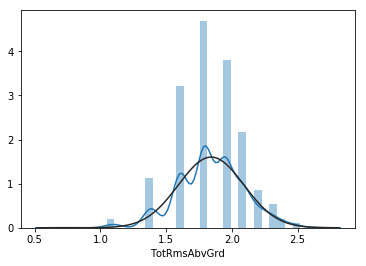

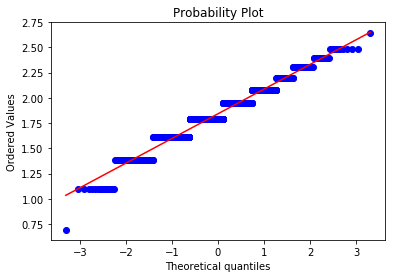

In [476]:
sns.distplot(data['TotRmsAbvGrd'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['TotRmsAbvGrd'], plot=plt)

**Normalizar YearBuilt**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


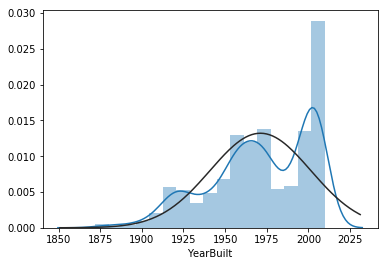

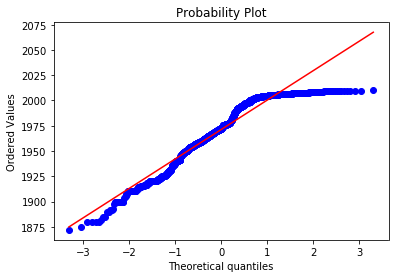

In [477]:
sns.distplot(data['YearBuilt'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['YearBuilt'], plot=plt)

In [478]:
data['YearBuilt'] = np.log(data['YearBuilt'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


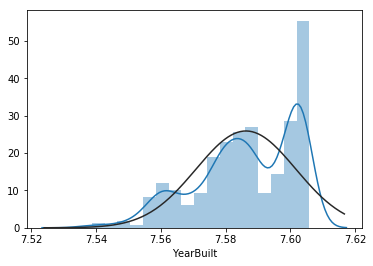

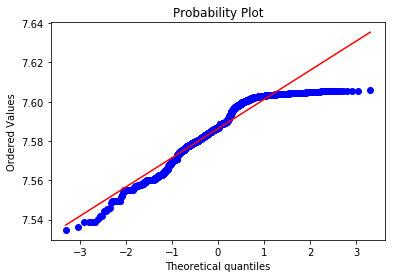

In [479]:
sns.distplot(data['YearBuilt'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['YearBuilt'], plot=plt)

**Normalizar LotArea**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


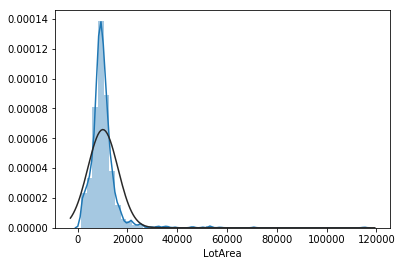

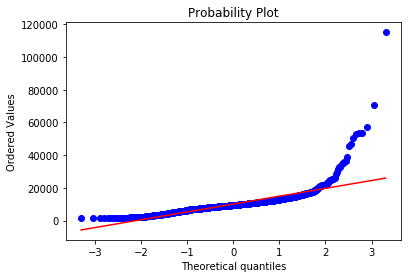

In [480]:
sns.distplot(data['LotArea'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['LotArea'], plot=plt)

In [481]:
data['LotArea'] = np.log(data['LotArea'])

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


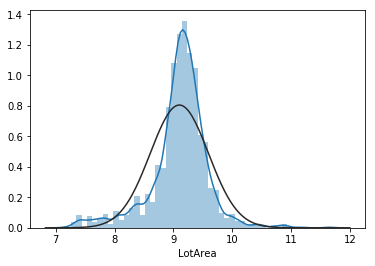

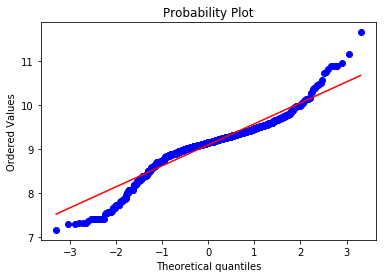

In [482]:
sns.distplot(data['LotArea'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['LotArea'], plot=plt)

**Normalizar MSZoning**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


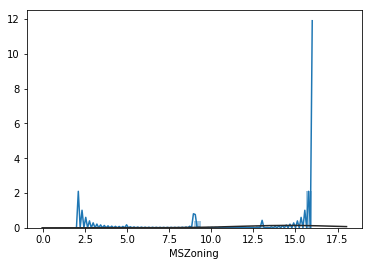

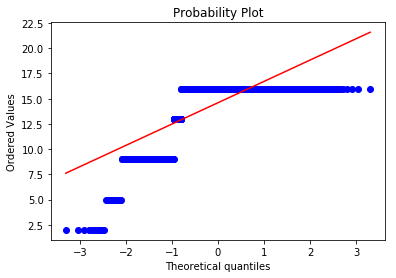

In [483]:
sns.distplot(data['MSZoning'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['MSZoning'], plot=plt)

No normalizar

**Normalizar ExtQual**

/home/erick/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


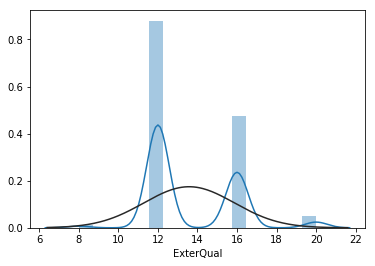

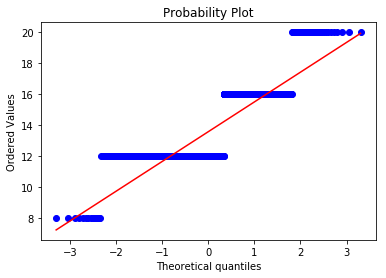

In [484]:
sns.distplot(data['ExterQual'], fit= stats.norm);
fig = plt.figure()
res = stats.probplot(data['ExterQual'], plot=plt)

### Data normalized:
* SalePrice
* GrLivArea
* 1stFlrSF
* TotRmsAbvGrd
* YearBuilt
* LotArea

# Etapa de entrenamiento - Usando regression de Sklearn

In [485]:
dict_train = {'OverallQual': data['OverallQual'],'GrLivArea':data['GrLivArea'], 
              'GarageCars':data['GarageCars'], 'TotalBsmtSF': data['TotalBsmtSF'],
              '1stFlrSF':data['1stFlrSF'],'FullBath':data['FullBath'], 
              'TotRmsAbvGrd':data['TotRmsAbvGrd'], 'YearBuilt':data['YearBuilt'],
              'YearRemodAdd':data['YearRemodAdd'], 'Fireplaces':data['Fireplaces'],
              'BsmtFinSF1':data['BsmtFinSF1'], 'LotFrontage':data['LotFrontage'],
              'WoodDeckSF':data['WoodDeckSF'], 'OpenPorchSF':data['OpenPorchSF'],
              'HalfBath':data['HalfBath'], 'LotArea':data['LotArea'], 'MSZoning':data['MSZoning'],
              'ExterQual':data['ExterQual'], 'BsmtQual':data['BsmtQual'],'SaleType':data['SaleType'],
              'SalePrice':data['SalePrice']
             }

In [486]:
data_train = pd.DataFrame(data = dict_train, index = data.index)

In [487]:
data_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.823217
GrLivArea       0.736717
ExterQual       0.685501
GarageCars      0.681758
TotalBsmtSF     0.647690
BsmtQual        0.626135
1stFlrSF        0.613938
FullBath        0.595273
YearBuilt       0.587691
YearRemodAdd    0.568690
TotRmsAbvGrd    0.540360
Fireplaces      0.489321
LotArea         0.400677
BsmtFinSF1      0.390281
LotFrontage     0.379751
MSZoning        0.375566
WoodDeckSF      0.337405
OpenPorchSF     0.327470
HalfBath        0.318009
SaleType        0.295196
Name: SalePrice, dtype: float64

In [488]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 1460
Data columns (total 21 columns):
OverallQual     1453 non-null int64
GrLivArea       1453 non-null float64
GarageCars      1453 non-null int64
TotalBsmtSF     1453 non-null int64
1stFlrSF        1453 non-null float64
FullBath        1453 non-null int64
TotRmsAbvGrd    1453 non-null float64
YearBuilt       1453 non-null float64
YearRemodAdd    1453 non-null int64
Fireplaces      1453 non-null int64
BsmtFinSF1      1453 non-null int64
LotFrontage     1196 non-null float64
WoodDeckSF      1453 non-null int64
OpenPorchSF     1453 non-null int64
HalfBath        1453 non-null int64
LotArea         1453 non-null float64
MSZoning        1453 non-null int64
ExterQual       1453 non-null int64
BsmtQual        1453 non-null int64
SaleType        1453 non-null int64
SalePrice       1453 non-null float64
dtypes: float64(7), int64(14)
memory usage: 249.7 KB


In [489]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(data_train)
X = imputer.transform(data_train)
data_tr = pd.DataFrame(X, columns=data_train.columns, index=list(data_train.index.values))

In [490]:
data_label = data_train['SalePrice'].copy()

In [491]:
data_tr.drop(['SalePrice'], axis = 1, inplace=True)

In [492]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(data_tr, data_label)
linear_reg.coef_

array([ 7.90727119e-02,  3.64793787e-01,  5.21677685e-02,  7.59758615e-05,
        1.04466239e-02, -2.59426471e-03, -3.95085280e-02,  1.50864590e+00,
        2.24384121e-03,  3.57494059e-02,  1.12955682e-04,  1.65250070e-04,
        1.01035235e-04,  1.00403046e-04,  1.57471909e-02,  7.23754137e-02,
        1.09280028e-02,  1.06683957e-02,  3.75933918e-03,  6.02356087e-03])

In [493]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = linear_reg.predict(data_tr)
mse_l = mean_squared_error(data_label, predictions)
rmse_l = np.sqrt(mse_l)
print(rmse_l)

0.1301402797055174


# Etapa de entrenamiento - Usando regression - implementación propia
Se utilizo la clase MyLinearRegression
 * fit: Ajuste de coeficientes:
 * predict: predecir dada una matriz de entrada
 
Se puede ver un ejemplo de como se utiliza en: **example.py**


In [494]:
import pandas as pd
from numpy.linalg import inv
from numpy import matmul, transpose

def load_data(url_d = None, index_c = 0):
    if url_d == None:
        print("Error: Ingrese Nombre del archivo o dirección")
    else:
        return pd.read_csv(url_d, index_col = index_c)


class MyLinearRegression:
    def __init__(self, coef = None):
        self.coef = coef
    
    def fit(self, data, labels):
        X = data.values
        Y = labels.values
        B = inv(matmul(transpose(X),X))
        B = matmul(B, matmul(transpose(X),Y))
        self.coef = B
    def predict(self, X):
        X_ = X.values
        return matmul(X_, self.coef)

In [495]:
myreg = MyLinearRegression()
myreg.fit(data_tr, data_label)

In [496]:
mypred = myreg.predict(data_tr)

mse_l = mean_squared_error(data_label, mypred)
rmse_l = np.sqrt(mse_l)
print('My-rmsel>', rmse_l)

My-rmsel> 0.13049293421007177


# Etapa de entrenamiento - Usando RandomForestRegressor


In [497]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(data_tr, data_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [498]:
predicted_forest = forest_reg.predict(data_tr)

mse_l_forest = mean_squared_error(data_label, predicted_forest)
rmse_l_forest = np.sqrt(mse_l_forest)
print('rmsel-forest>', rmse_l_forest)

rmsel-forest> 0.06188298961211534


# Etapa de entrenamiento - Usando SVM

In [499]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_tr, data_label)
svm_predictions = svm_reg.predict(data_tr)
svm_mse = mean_squared_error(data_label, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print('rmsel-svr>', svm_rmse)

rmsel-svr> 1.9466612634328595


# Predict with data Test - Concurso Kaggle

In [500]:
# Test Data:
# Get appropiate URL's
import os

url_test = os.path.join('all','test.csv')
data_test = pd.read_csv(url_test, index_col = 0)
dict_test = {'OverallQual': data_test['OverallQual'],'GrLivArea':data_test['GrLivArea'], 
              'GarageCars':data_test['GarageCars'], 'TotalBsmtSF': data_test['TotalBsmtSF'],
              '1stFlrSF':data_test['1stFlrSF'],'FullBath':data_test['FullBath'], 
              'TotRmsAbvGrd':data_test['TotRmsAbvGrd'], 'YearBuilt':data_test['YearBuilt'],
              'YearRemodAdd':data_test['YearRemodAdd'], 'Fireplaces':data_test['Fireplaces'],
              'BsmtFinSF1':data_test['BsmtFinSF1'], 'LotFrontage':data_test['LotFrontage'],
              'WoodDeckSF':data_test['WoodDeckSF'], 'OpenPorchSF':data_test['OpenPorchSF'],
              'HalfBath':data_test['HalfBath'], 'LotArea':data_test['LotArea'],'MSZoning':data_test['MSZoning'],
              'ExterQual':data_test['ExterQual'], 'BsmtQual':data_test['BsmtQual'],'SaleType':data_test['SaleType']
             }
data_testing = pd.DataFrame(data = dict_test, index = data_test.index)
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 20 columns):
OverallQual     1459 non-null int64
GrLivArea       1459 non-null int64
GarageCars      1458 non-null float64
TotalBsmtSF     1458 non-null float64
1stFlrSF        1459 non-null int64
FullBath        1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
Fireplaces      1459 non-null int64
BsmtFinSF1      1458 non-null float64
LotFrontage     1232 non-null float64
WoodDeckSF      1459 non-null int64
OpenPorchSF     1459 non-null int64
HalfBath        1459 non-null int64
LotArea         1459 non-null int64
MSZoning        1455 non-null object
ExterQual       1459 non-null object
BsmtQual        1415 non-null object
SaleType        1458 non-null object
dtypes: float64(4), int64(12), object(4)
memory usage: 239.4+ KB


In [501]:
data_testing['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [502]:
replace_map = {'MSZoning':{'A': 1, 'C (all)': 2 , 'RH': 5,  'RM': 9,'FV': 13,  'RL': 16}}
data_testing.replace(replace_map, inplace = True)
data_testing['MSZoning'].value_counts()

16.0    1114
9.0      242
13.0      74
2.0       15
5.0       10
Name: MSZoning, dtype: int64

In [503]:
replace_ext = {'ExterQual':{'TA':12,'Gd':16,'Ex':20,'Fa':8,'Po':3}}
data_testing.replace(replace_ext, inplace = True)
data_testing['ExterQual'].value_counts()

12    892
16    491
20     55
8      21
Name: ExterQual, dtype: int64

In [504]:
data_testing['BsmtQual'].fillna(value=1, inplace=True)
replace_BSMTQ= {'BsmtQual':{'TA':12,'Gd':16,'Ex':20,'Fa':8,'Po':5}}
data_testing.replace(replace_BSMTQ, inplace = True)
data_testing['BsmtQual'].value_counts()

12    634
16    591
20    137
8      53
1      44
Name: BsmtQual, dtype: int64

In [505]:
replace_SaleT= {'SaleType':{'WD':17,'New':25,'COD':18,'ConLD':13,'ConLI':19,
                           'ConLw':30,'CWD':15,'Oth':12,'Con':10}}
data_testing.replace(replace_SaleT, inplace = True)
data_testing['SaleType'].value_counts()

17.0    1258
25.0     117
18.0      44
13.0      17
15.0       8
19.0       4
12.0       4
30.0       3
10.0       3
Name: SaleType, dtype: int64

In [506]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 20 columns):
OverallQual     1459 non-null int64
GrLivArea       1459 non-null int64
GarageCars      1458 non-null float64
TotalBsmtSF     1458 non-null float64
1stFlrSF        1459 non-null int64
FullBath        1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
Fireplaces      1459 non-null int64
BsmtFinSF1      1458 non-null float64
LotFrontage     1232 non-null float64
WoodDeckSF      1459 non-null int64
OpenPorchSF     1459 non-null int64
HalfBath        1459 non-null int64
LotArea         1459 non-null int64
MSZoning        1455 non-null float64
ExterQual       1459 non-null int64
BsmtQual        1459 non-null int64
SaleType        1458 non-null float64
dtypes: float64(6), int64(14)
memory usage: 239.4 KB


In [507]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(data_testing)

X = imputer.transform(data_testing)
data_TEST = pd.DataFrame(X, columns=data_testing.columns, index=list(data_testing.index.values))

In [508]:
data_TEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 20 columns):
OverallQual     1459 non-null float64
GrLivArea       1459 non-null float64
GarageCars      1459 non-null float64
TotalBsmtSF     1459 non-null float64
1stFlrSF        1459 non-null float64
FullBath        1459 non-null float64
TotRmsAbvGrd    1459 non-null float64
YearBuilt       1459 non-null float64
YearRemodAdd    1459 non-null float64
Fireplaces      1459 non-null float64
BsmtFinSF1      1459 non-null float64
LotFrontage     1459 non-null float64
WoodDeckSF      1459 non-null float64
OpenPorchSF     1459 non-null float64
HalfBath        1459 non-null float64
LotArea         1459 non-null float64
MSZoning        1459 non-null float64
ExterQual       1459 non-null float64
BsmtQual        1459 non-null float64
SaleType        1459 non-null float64
dtypes: float64(20)
memory usage: 239.4 KB


In [509]:
# Scale data of input
# GrLivArea
# 1stFlrSF
# TotRmsAbvGrd
# YearBuilt
# LotArea
data_TEST['GrLivArea'] = np.log(data_TEST['GrLivArea'])
data_TEST['1stFlrSF'] = np.log(data_TEST['1stFlrSF'])
data_TEST['TotRmsAbvGrd'] = np.log(data_TEST['TotRmsAbvGrd'])
data_TEST['YearBuilt'] = np.log(data_TEST['YearBuilt'])
data_TEST['LotArea'] = np.log(data_TEST['LotArea'])

In [510]:
data_TEST.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,HalfBath,LotArea,MSZoning,ExterQual,BsmtQual,SaleType
1461,5.0,6.797940,1.0,882.0,6.797940,1.0,1.609438,7.581210,1961.0,0.0,468.0,80.0,140.0,0.0,0.0,9.360655,5.0,12.0,12.0,17.0
1462,6.0,7.192182,1.0,1329.0,7.192182,1.0,1.791759,7.579679,1958.0,0.0,923.0,81.0,393.0,36.0,1.0,9.565704,16.0,12.0,12.0,17.0
1463,5.0,7.395722,2.0,928.0,6.833032,2.0,1.791759,7.599401,1998.0,1.0,791.0,74.0,212.0,34.0,1.0,9.534595,16.0,12.0,16.0,17.0
1464,6.0,7.380256,2.0,926.0,6.830874,2.0,1.945910,7.599902,1998.0,1.0,602.0,78.0,360.0,36.0,1.0,9.208138,16.0,12.0,12.0,17.0
1465,8.0,7.154615,2.0,1280.0,7.154615,2.0,1.609438,7.596894,1992.0,0.0,263.0,43.0,0.0,82.0,0.0,8.518193,16.0,16.0,16.0,17.0


In [511]:
# The LinearRegression Model: linear_reg
data_predicted_test = linear_reg.predict(data_TEST)
print(data_predicted_test)

[11.52308447 11.99934153 12.14336214 ... 12.11036495 11.69586054
 12.37564558]


In [512]:
rs = np.exp(data_predicted_test)
print(rs)

[101021.07851054 162647.65752905 187843.06609326 ... 181745.92021053
 120073.64460952 236959.75031614]


In [513]:
frame_predicted = pd.DataFrame(index = data_TEST.index,data=rs, columns=['SalePrice'])
frame_predicted.index.name = 'Id'
frame_predicted.head()

,SalePrice
Id,
1461,101021.078511
1462,162647.657529
1463,187843.066093
1464,192352.531922
1465,188893.437414


In [425]:
frame_predicted.to_csv("fourth-submission.csv")

In [117]:
# Predicting with RandomForest:


In [118]:
forest_predicted = forest_reg.predict(data_TEST)
print(forest_predicted)

[11.64930761 11.90445883 12.0133106  ... 12.02617503 11.52710023
 12.38893507]


In [121]:
rs_forest = np.exp(forest_predicted)
print(rs_forest)

[114611.97953963 147924.72852607 164935.63699856 ... 167071.14704429
 101427.57060837 240129.84372319]


In [120]:
frame_predicted_forest = pd.DataFrame(index = data_TEST.index,data=rs_forest, columns=['SalePrice'])
frame_predicted_forest.index.name = 'Id'
frame_predicted_forest.head()

,SalePrice
Id,
1461,114611.979540
1462,147924.728526
1463,164935.636999
1464,180401.064599
1465,201780.466307


In [122]:
frame_predicted_forest.tail()

,SalePrice
Id,
2915,79707.093332
2916,83962.621741
2917,167071.147044
2918,101427.570608
2919,240129.843723


In [124]:
frame_predicted_forest.to_csv("ten-submission.csv")